### Kod için kaynak: GitHub repository @zotroneneis/machine_learning_basics  [ by Anna-Lena Popkes ] 

https://github.com/zotroneneis/machine_learning_basics/blob/master/perceptron.ipynb

In [1]:
# Kullanacağımız Kütüphaneler ve/veya fonksiyonları ekleyelim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sklearn yine çok kullanılan bir Makine Öğrenmesi kütüphanesi
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Random yani rastgele süreçleri tekrar edilebilir olması için herhangi bir sayı seed(çekirdek) olarak seçilir
np.random.seed(37)

### Veri Seti (Yapay Oluşturma)

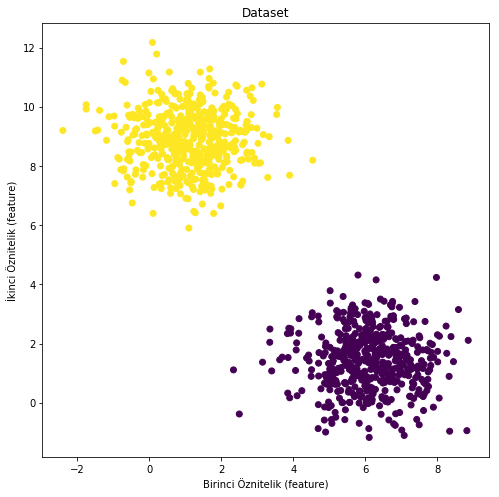

In [3]:
X, y = make_blobs(n_samples=1000, centers=2)
fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("Birinci Öznitelik (feature)")
plt.ylabel("İkinci Öznitelik (feature)")
plt.show()

In [4]:
# Etiketlere yeni eksen ekleme (tamamen yazılımsal bir özellik)

y_true = y[:, np.newaxis]

print("y", y.shape)
print("y_true", y_true.shape)

y (1000,)
y_true (1000, 1)


In [6]:
# Eğitim ve Test setlerine ayırma işlemi
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1))
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [7]:
class Perceptron():
    """
    Perseptron ağını Python nesnesi olarak tanımlanması
    """

    def __init__(self):
        """
        Eğer bir sınıfla ilgili öntanımlı "başlangıç" (initialization) değerleri burada belirlenir. 
        Bu örnekte herhangi bir tanım yok, o yüzden pass denilmiş.
        """
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100):
        """
        Perseptron ağını eğitir ve yeni ağırlık ve bias parametrelerini bulur.
        Girdiler
        X             :  Veri
        y             :  Verinin sınıfı (1 veya 0)
        learning rate :  Öğrenme katsayısı, varsayılan = 0.05
        n_iters       :  İterasyon sayısı (Verinin üzerinden kaç defa eğitim yapılacağı), varsayılan = 100
        Çıktılar
        self.weights  :  Ağın ağırlıkları
        self.bias     :  Ağın bias (yanlılık) değeri
       """
        n_samples, n_features = X.shape

        # 1. Adım: Parametrelere ilk değerlerini atayalım
        self.weights = np.zeros((n_features,1))
        self.bias = 0

        for i in range(n_iters):
            # 2. Adım: Çarpma ve toplama işlemleri (sum(w * x) + b)
            a = np.dot(X, self.weights) + self.bias

            # 3. Adım: Aktivasyon (basamak fonk.)
            y_predict = self.step_function(a)

            # 4. Adım: Parametrelerin değişim miktarlarını hesapla
            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)

            # Step 4: Parametreleri güncelle
            self.weights = self.weights + delta_w
            self.bias += delta_b

        return self.weights, self.bias

    def step_function(self, x):
        """
        Basamak fonksiyonu (0'dan büyük değerler için 1, aksi durumlarda 0 verir)
        """
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

    def predict(self, X):
        """
        Ağı kullanarak tahminlerde bulunur.
        Girdiler: X verisi
        Çıktı:    X verisi için tahmin y_prediction
        """
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)

### Modeli başlatıp (somutlaştırıp) eğitme

In [8]:
model = Perceptron()

w_trained, b_trained = model.train(X_train, y_train,learning_rate=0.05, n_iters=500)

### Eğitilen model ile eğitim seti ve test seti için tahminlerde bulunma

In [9]:
y_p_train = model.predict(X_train)
y_p_test = model.predict(X_test)

print(f"eğitim doğruluk yüzdesi: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test doğruluk yüzdesi: {100 - np.mean(np.abs(y_p_test - y_test)) * 100}%")

eğitim doğruluk yüzdesi: 100.0%
test doğruluk yüzdesi: 99.6%


In [10]:
# Eğitilmiş modelin tanımladığı ayracı (hiperdüzlem veya aşırıdüzlem) ve veriyi çizdirmek için fonksiyon 
def plot_hyperplane(X, y, weights, bias):
    """
    Veriyi ve tahmin edilen uydurulmuş karar eğrisi grafiğini çizdirir
    Girdiler
    X, y           : Veri : Girdi ve çıktı değerleri
    weights, bias  : Model eğitimi sonunda elde edilen parametreler
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Veriseti ve uydurulmuş karar aşırıdüzlemi")
    plt.xlabel("Birinci Öznitelik (feature)")
    plt.ylabel("İkinci Öznitelik (feature)")
    plt.show()

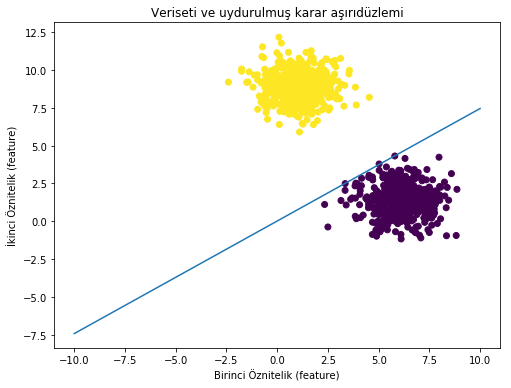

In [11]:
plot_hyperplane(X, y, w_trained, b_trained)